# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from api_keys import ow_key
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
#create empty lists that will hold information from the cities sample 
city_name=[]
cloud=[]
country=[]
date=[]
humidity=[]
latitude=[]
longitude=[]
temp_max=[]
w_speed=[]

#Set count variables to display the record and set numbers
rec = 0
counter = 1

#Storing url adress into a variable to be called later 
url = "http://api.openweathermap.org/data/2.5/weather?"
#print the message to start of data retrieving
print('Beginning Data Retrieval')
print('----------------------------')
#Loop through the random cities list to insert each information into its respective empty list above
for city in cities:
    complete_url =f'{url}appid={ow_key}&units=imperial&q={city}'
    ow_resp = requests.get(complete_url)
    ow_json = ow_resp.json()
    try:
        city_name.append(ow_json["name"])
        cloud.append(ow_json["clouds"]["all"])
        country.append(ow_json["sys"]["country"])
        date.append(ow_json["dt"])
        humidity.append(ow_json["main"]["humidity"])
        latitude.append(ow_json["coord"]["lat"])
        longitude.append(ow_json["coord"]["lon"])
        temp_max.append(ow_json["main"]["temp_max"])
        w_speed.append(ow_json["wind"]["speed"])
        rec = rec+1
        print(f'Processing Record {rec} of Set {counter} | {city}')
    except:
        print('City not found. Skipping....')
        
#When record count reaches 50 i will to restart the count and add to another set number sequence
    if rec >= 50:
        counter=counter+1
        rec=0
        
#Printing message to inform the end of data retrieve    
print('----------------------------')
print('Data Retrieval Complete')
print('----------------------------')

Beginning Data Retrieval
----------------------------
Processing Record 1 of Set 1 | hithadhoo
Processing Record 2 of Set 1 | lebu
Processing Record 3 of Set 1 | bathsheba
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | viedma
Processing Record 6 of Set 1 | auki
Processing Record 7 of Set 1 | albany
City not found. Skipping....
Processing Record 8 of Set 1 | pingliang
Processing Record 9 of Set 1 | chokurdakh
Processing Record 10 of Set 1 | alta floresta
Processing Record 11 of Set 1 | hay river
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | preobrazheniye
Processing Record 14 of Set 1 | tiksi
Processing Record 15 of Set 1 | bluff
Processing Record 16 of Set 1 | saldanha
Processing Record 17 of Set 1 | barrow
Processing Record 18 of Set 1 | havre-saint-pierre
Processing Record 19 of Set 1 | provideniya
Processing Record 20 of Set 1 | springbok
Processing Record 21 of Set 1 | sorong
Processing Record 22 of Set 1 | sao jose da coroa gran

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Creating new variable to establish column names and the values for each column, an then convert it into data frame
cities_data = {'Date': date, 'City Name': city_name,'Latitude': latitude, 'Longitude': longitude, 'Country': country, 'Cloud': cloud,  'Humidity': humidity, 
              'Maximum Temperatures': temp_max, 'Wind Speed': w_speed, }
open_weather_df = pd.DataFrame(cities_data)

#outputting the data frame into a new file
open_weather_df.to_csv('ow_df.csv', index= False, header= True)

open_weather_df.head()

,Date,City Name,Latitude,Longitude,Country,Cloud,Humidity,Maximum Temperatures,Wind Speed
0,1571286121,Castro,-42.48,-73.76,CL,90,87,46.40,5.82
1,1571286025,New Norfolk,-42.78,147.06,AU,20,67,62.01,17.22
2,1571286135,Henties Bay,-22.12,14.28,NA,84,88,63.00,4.00
3,1571286047,Los Llanos de Aridane,28.66,-17.92,ES,20,64,68.00,9.17
4,1571286015,Rikitea,-23.12,-134.97,PF,100,86,71.85,9.74


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

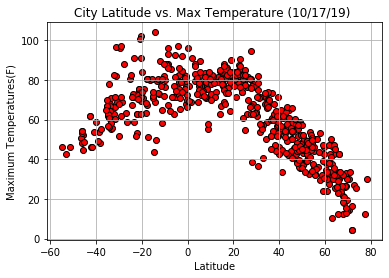

In [8]:
lat_temp = plt.scatter(open_weather_df['Latitude'], open_weather_df['Maximum Temperatures'], marker='o', facecolor='red', edgecolors='black')
plt.title('City Latitude vs. Max Temperature (10/17/19) ')
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperatures(F)')
plt.grid()
plt.savefig('Charts/lat_maxtemp.png')
plt.show()

#### Latitude vs. Humidity Plot

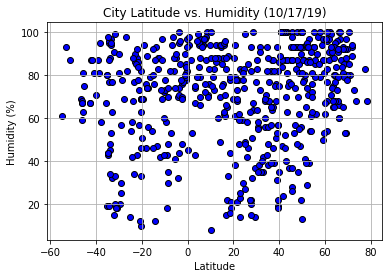

In [10]:
lat_humidity = plt.scatter(open_weather_df['Latitude'], open_weather_df['Humidity'], marker='o', facecolor='blue', edgecolors='black')
plt.title('City Latitude vs. Humidity (10/17/19)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig('Charts/lat_humidity.png')
plt.show()

#### Latitude vs. Cloudiness Plot

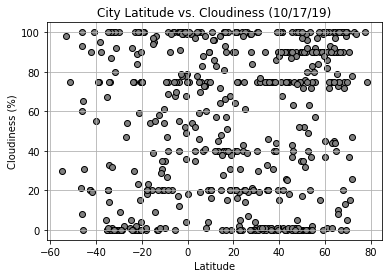

In [11]:
lat_cloud = plt.scatter(open_weather_df['Latitude'], open_weather_df['Cloud'], marker='o', facecolor='grey', edgecolors='black')
plt.title('City Latitude vs. Cloudiness (10/17/19)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig('Charts/lat_cloud.png')
plt.show()

#### Latitude vs. Wind Speed Plot

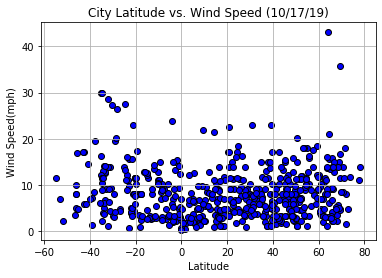

In [12]:
lat_wind = plt.scatter(open_weather_df['Latitude'], open_weather_df['Wind Speed'], marker='o', facecolor='blue', edgecolors='black')
plt.title('City Latitude vs. Wind Speed (10/17/19)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.grid()
plt.savefig('Charts/lat_wind.png')
plt.show()